In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("".join((os.getcwd().split("PCNN")[0], "/PCNN/src/")))
import run_core as rc
import utils_core as utc
import libs.pclib as pclib
import pcnn_core as pcr
from IPython.display import clear_output
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

#plt.style.use('classic')

logger = utc.setup_logger("M", level=1)
logger()

2024-12-15 01:47:04 | 


pygame 2.5.2 (SDL 2.28.3, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## pcnn model

In [2]:
N = 30
nj = 12
Nj = nj**2

""" TRAJECTORY """

duration = 100
dx = 0.1
trajectory = np.stack((np.arange(duration),
                       np.zeros(duration))) * 0.1
tot = 7

xfilterr = pclib.RandLayer(Nj)
pcnn2Dr = pclib.PCNNrand(N=N, Nj=Nj,
                    gain=4., offset=1.4,
                    clip_min=0.09,
                    threshold=0.5,
                    rep_threshold=0.4,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=xfilterr, name="2D")


xfilter = pclib.PCLayer(n=nj, sigma=0.03, bounds=np.array([0, 1, 0, 1]))
pcnn2D = pclib.PCNN(N=N, Nj=Nj,
                    gain=4., offset=1.4,
                    clip_min=0.09,
                    threshold=0.5,
                    rep_threshold=0.4,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=xfilter, name="2D")

activityr = np.zeros((Nj, duration))
activity = np.zeros((Nj, duration))

for i, x in enumerate(trajectory.T):
    
    activityr[:, i] = xfilterr(x)
    activity[:, i] = xfilter(x)
    pcnn2Dr(x)
    pcnn2D(x)
    pcnn2Dr.update()
    pcnn2D.update()

logger()

2024-12-06 21:31:25 | 


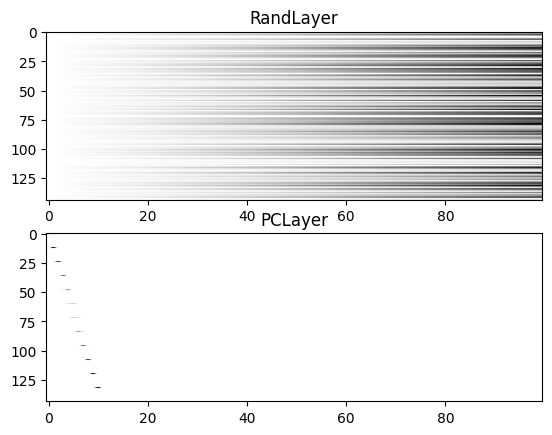

In [3]:
plt.subplot(211)
plt.imshow(activityr, cmap="Greys", aspect="auto")
plt.title(f"{xfilterr}")
plt.subplot(212)
plt.imshow(activity, cmap="Greys", aspect="auto")
plt.title(f"{xfilter}")
plt.show()

In [4]:
w = xfilterr.get_centers()
w1, w2 = w.T

In [5]:
w1.reshape(1, -1) @ w2.reshape(-1, 1)

array([[1.0477379e-09]], dtype=float32)

In [7]:
w2.sum()

0.99999994

In [8]:
xfilterr(np.array([0., 0.]))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## simulation

In [2]:
sim_settings = rc.sim_settings
agent_settings = rc.agent_settings
model_params = rc.model_params

In [3]:
load = False

In [4]:
rc.edit_logger(level=3)

In [7]:
if load:
    sim_settings, agent_settings, model_params = utc.load_model_settings(idx=None,
                                                                         verbose=True)

    if sim_settings is None:
        load = False
        

count = 0
while True:

    logger(f"[round {count}]", level=0)

    if not load:
        sim_settings["seed"] = np.random.randint(0, 1000)
        sim_settings["init_position"] = np.random.uniform(0.1, 0.9, 2)
        sim_settings["rw_fetching"] = "deterministic"
        sim_settings["rw_position"] = np.random.uniform(0.1, 0.9, 2)
        sim_settings["rw_radius"] = 0.05
        sim_settings["plot_interval"] = 5
        sim_settings["speed"] = 0.04
        sim_settings["max_duration"] = 1000

        agent_settings["max_depth"] = 20
        agent_settings["exp_weights"] = np.array([-1., 0.2, -1., 0.2, 0.4]),

    model = rc.main(sim_settings=sim_settings,
         agent_settings=agent_settings,
         model_params=model_params)

    count += 1


2024-11-19 14:11:35 | [round 0]
2024-11-19 14:11:35 | room: square
2024-11-19 14:11:35 | plot_interval: 5
2024-11-19 14:11:35 | 1000
2024-11-19 14:11:35 | N=80
2024-11-19 14:11:35 | Nj=169
2024-11-19 14:11:35 | Reward(deterministic, static)
2024-11-19 14:12:45 | [round 1]
2024-11-19 14:12:45 | room: square
2024-11-19 14:12:45 | plot_interval: 5
2024-11-19 14:12:45 | 1000
2024-11-19 14:12:45 | N=80
2024-11-19 14:12:45 | Nj=169
2024-11-19 14:12:45 | Reward(deterministic, static)
2024-11-19 14:13:47 | [round 2]
2024-11-19 14:13:47 | room: square
2024-11-19 14:13:47 | plot_interval: 5
2024-11-19 14:13:47 | 1000
2024-11-19 14:13:47 | N=80
2024-11-19 14:13:47 | Nj=169
2024-11-19 14:13:47 | Reward(deterministic, static)


KeyboardInterrupt: 

In [10]:
model.__str__()

'<mod_core.Brain object at 0x13015b290>'

## orthonormal basis

In [13]:
def make_orthonormal(matrix):
    v1, v2 = matrix.T
    v2 = v2 - (v1 @ v2) / (v1 @ v1) * v1
    matrix[:, 0] = v1
    matrix[:, 1] = v2
    for i in range(len(matrix.T)):
        matrix[i, :] /= matrix[i, :].sum()
    return matrix

    for i in range(len(matrix)):
        if matrix[i, 1] < 0:
            if np.random.random() < 0.5:
                matrix[i, 1] = 0
            else:
                matrix[i, 1] *= -1
                matrix[i, 0] = 0
                
    return matrix


def cos_mv(matrix, vector):
    # Normalize the matrix and vector
    matrix_norms = np.linalg.norm(matrix, axis=1, keepdims=True)
    vector_norm = np.linalg.norm(vector)
    
    # Avoid division by zero
    matrix_norms[matrix_norms == 0] = 1
    vector_norm = max(vector_norm, 1)
    
    # Compute cosine similarity
    return np.dot(matrix, vector) / (matrix_norms.flatten() * vector_norm)

def dist(matrix, vector):
    return np.exp(-np.linalg.norm(matrix - vector, axis=1))

In [124]:
a.T

array([[3., 9.],
       [1., 7.]])

In [132]:
a = np.around(np.random.rand(2, 2), 1) * 10
z = np.around(np.random.rand(2), 1) * 10
a, z, cos_mv(a, z)

(array([[ 9., 10.],
        [ 2.,  2.]]),
 array([7., 5.]),
 array([0.97638994, 0.98639392]))

In [4]:
""" data """

duration = 10
dx = 0.1
X = np.stack((np.arange(duration) * dx, np.zeros(duration))).reshape(-1, 2, 1)

In [14]:
""" model core """

N = 3
Nj = 5

wl1 = make_orthonormal(np.random.rand(Nj, 2))
wff = np.zeros((N, Nj))

In [8]:
""" run """

# 1
yl1 = wl1 @ X[0]
wff[0] += yl1.flatten() - wff[0]
y1 = dist(wff, yl1.flatten())
print(f"{yl1.T=}\n{wff=}\n{y1.T}")


# 2
yl2 = wl1 @ X[1]
wff[1] += yl2.flatten() - wff[0]

y2 = dist(wff, yl2.flatten())

print(f"\n{yl2.T=}\n{wff=}\n{y2.T}")

yl1.T=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857]])
wff=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
[1.         0.89916913 0.89916913]

yl2.T=array([[0.20750604, 0.10055559, 0.02656407, 0.20549207, 0.08683678]])
wff=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857],
       [ 0.2       ,  0.2       ,  0.02201501,  0.17980408,  0.11272535],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
[0.70167168 0.89916913 0.72474383]


In [15]:
wl1

array([[ 0.68642833,  0.31357167],
       [ 0.34675172,  0.65324828],
       [ 0.29309605,  0.50138846],
       [ 0.01488249,  0.47337545],
       [ 0.88203544, -0.42489928]])

In [200]:
wff - yl.reshape(1, -1)

array([[-2.00000000e-01, -1.36782536e-01, -1.00000000e-01,
        -1.09954685e-01, -2.06308502e-01],
       [ 0.00000000e+00, -3.67825358e-02,  2.77555756e-17,
         2.77555756e-17, -4.94110861e-02],
       [-2.00000000e-01, -2.36782536e-01, -2.00000000e-01,
        -2.00000000e-01, -2.49411086e-01]])

In [9]:
class Model:

    def __init__(self, N, Nj, beta, alpha, sigma, threshold):
        self.beta = beta
        self.alpha = alpha
        self.sigma = sigma
        self.threshold = threshold

        self.wxf = make_orthonormal(np.random.rand(Nj, 2))
        self.wff = np.zeros((N, Nj))
        self.N = N
        self.count = 0

    def __call__(self, x):
        x = self.wxf @ x
        u = np.exp(-((self.wff - x.reshape(1, -1))**2).sum(axis=1) / (self.sigma))
        u[self.count:] = 0.
        #print(u)
        if u.max() > self.threshold and self.count > 0
            #print(f"{u.argmax()} is above [{u.max():.3f}]")
            return u
        if self.count == self.N:
            print("/full")
            return np.zeros(self.N)
        self._update(x=x.flatten())
        return np.zeros(self.N)

    def _update(self, x):
        self.wff[self.count, :] += (x - self.wff[self.count, :])
        self.count += 1
        print(f"+1 | {self.wff[self.count-1]}")

In [10]:
""" data """

duration = 20
dx = 0.1
X = np.stack((np.arange(1, duration+1) * dx, np.zeros(duration))).T


+1 | [0.17581584 0.07832773 0.06049412 0.02823296 0.01413994 0.05877934
 0.01769154 0.09637979 0.00304787 0.06429924]
+1 | [0.87907921 0.39163866 0.30247062 0.14116478 0.07069969 0.29389668
 0.08845768 0.48189895 0.01523933 0.32149622]
+1 | [1.58234258 0.70494959 0.54444712 0.2540966  0.12725944 0.52901402
 0.15922383 0.8674181  0.0274308  0.57869319]
+1 | [2.28560595 1.01826052 0.78642362 0.36702842 0.18381919 0.76413136
 0.22998998 1.25293726 0.03962226 0.83589016]
/full
/full
/full
/full


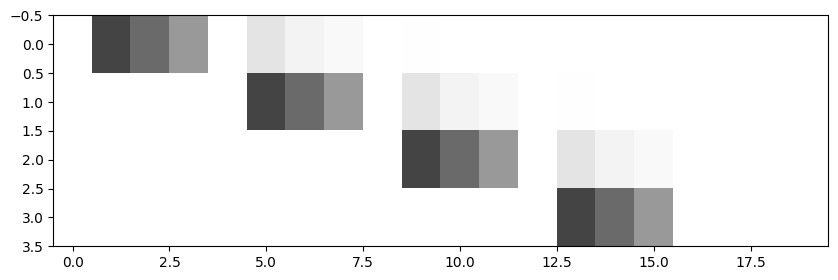

In [36]:
""" model core """

N = 4
Nj = 10
model = Model(N, Nj, 0, 0, 1, 0.5)

a = np.zeros((N, len(X)))
for i, x in enumerate(X):
    #print(f"\t\t{x.T}")
    a[:, i] = model(x.T).flatten()

plt.figure(figsize=(10, 3))
plt.imshow(a, cmap="Greys", aspect="auto", vmax=1.2)
plt.show()

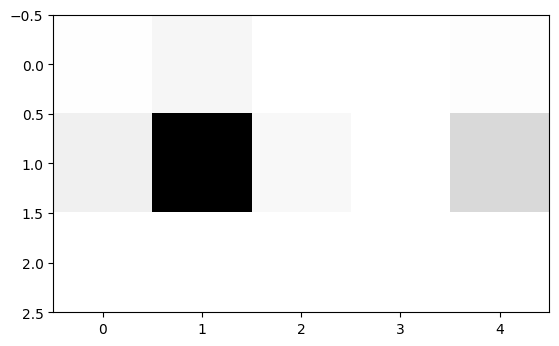

In [371]:
plt.imshow(model.wff, cmap="Greys");

## GC

In [38]:
class GC:
    def __init__(self, sigma: float, tuning: str="square", speed=1.):
        self.sigma = sigma
        self.x = 0.25
        self.y = 0.5
        self.speed = speed 
        self.tuning = tuning
        self.trajectory = []
        
    def __call__(self, vx: float, vy: float):
        self.x += vx*self.speed
        self.y += vy*self.speed
        
        if self.tuning == "square":
            self._square_tuning()
        elif self.tuning == "klein":
            self._klein_tuning()
        elif self.tuning == "klein_idk":
            self._klein_tuning_idk()
        elif self.tuning == "circle":
            self._circle_tuning()
        else:
            raise ValueError("wrong tuning bro")

        self.trajectory += [[self.x, self.y]]
        if len(self.trajectory) > 20_000:
            del self.trajectory[0]
        ux = np.exp(-((self.x-0.5)/self.sigma)**2)
        uy = np.exp(-((self.y-0.5)/self.sigma)**2)
        return ux * uy

    def _square_tuning(self):

        if self.x < 0:
            self.x += 1
            #self.y = 1 - self.y
        elif self.x > 1:
            self.x -= 1
            #self.y = 1 - self.y
        if self.y < 0:
            self.y += 1
            #self.x = 1 - self.x
        elif self.y > 1:
            self.y -= 1

    def _klein_tuning(self):
        if self.x < 0:
            self.x += 1
            self.y = 1 - self.y
        elif self.x > 1:
            self.x -= 1
            self.y = 1 - self.y
        if self.y < 0:
            self.y += 1
        elif self.y > 1:
            self.y -= 1

    def _klein_tuning_idk(self):
        if self.x < 0:
            self.x += 1
            self.y = 1 - self.y
        elif self.x > 1:
            self.x -= 1
            self.y = 1 - self.y
        if self.y < 0:
            self.y += 1
            self.x = 1 - self.x
        elif self.y > 1:
            self.y -= 1
            self.x = 1 - self.x

    def _hexagon(self):
        pass

    def _circle_tuning2(self):

        if (self.x - 0.5)**2 + (self.y - 0.5)**2 > 0.5:
            self.x = self.x - 2*(self.x-0.5)
            self.y = self.y - 2*(self.y-0.5)

    def _circle_tuning(self):
        # Calculate the distance from the center (0.5, 0.5)
        distance_squared = (self.x - 0.5) ** 2 + (self.y - 0.5) ** 2
    
        # Check if the point is outside the circle of radius 0.5
        if distance_squared > 0.25:  # radius^2 = 0.5^2 = 0.25
            # Normalize the vector from the center to the point
            dx = self.x - 0.5
            dy = self.y - 0.5
            magnitude = (dx**2 + dy**2)**0.5
            
            # Scale the normalized vector to move the point to the opposite side of the circle
            self.x = 0.5 - dx / magnitude * 0.5
            self.y = 0.5 - dy / magnitude * 0.5

    def render(self):

        plt.plot(*np.array(self.trajectory).T, '-', lw=0.5)
        plt.title(f"GC: {self.tuning}")
        plt.xticks(())
        plt.yticks(())
        plt.xlim((0, 1))
        plt.ylim((0, 1))

    def pos(self):
        return f"({self.x:.3f}, {self.y:.3f})"

In [16]:
# Generate the grid points
dxy = 0.025
x = np.arange(-3, 3 + dxy, dxy)
y = np.arange(-3, 3 + dxy, dxy)
xx, yy = np.meshgrid(x, y)

# Combine the grid points into a single array of coordinates
points = np.vstack([xx.ravel(), yy.ravel()]).T
points

array([[-3.   , -3.   ],
       [-2.975, -3.   ],
       [-2.95 , -3.   ],
       ...,
       [ 2.95 ,  3.   ],
       [ 2.975,  3.   ],
       [ 3.   ,  3.   ]])

(0.0072220064426977825, 0.9978760486325475)

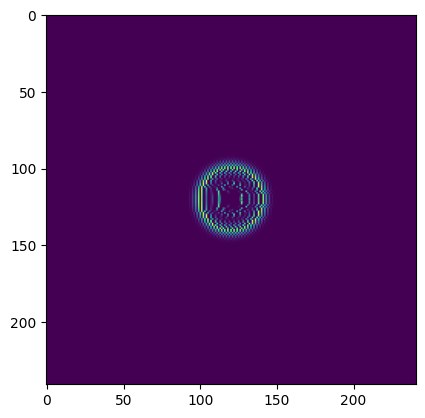

In [17]:
gc = GC(sigma=0.1, tuning="circle")
u = np.array([gc(*p) for p in points])
plt.imshow(u.reshape(int(np.sqrt(len(u))), int(np.sqrt(len(u)))));
u.mean(), u.max()

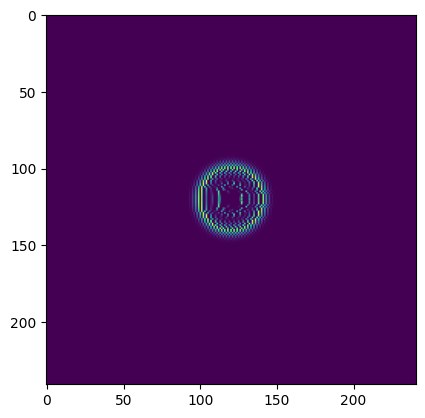

In [18]:
plt.imshow(u.reshape(int(np.sqrt(len(u))), int(np.sqrt(len(u)))));

ValueError: 'c' argument has 10201 elements, which is inconsistent with 'x' and 'y' with size 58081.

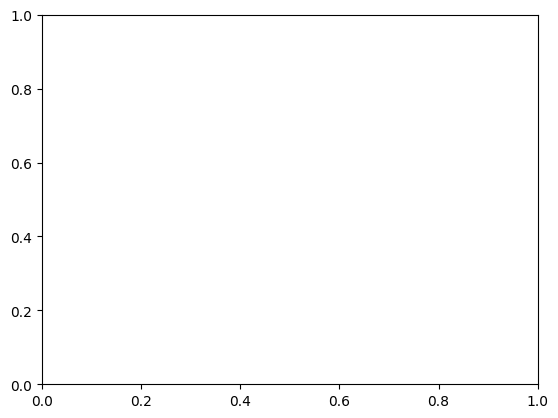

In [182]:
plt.scatter(*points.T, c=u)
plt.axis("off")
plt.show()

In [61]:
np.array(traj), a

(array([[0.21, 0.21]]), [1.5229979744712738e-08, 4.956405319172534e-08])

KeyboardInterrupt: 

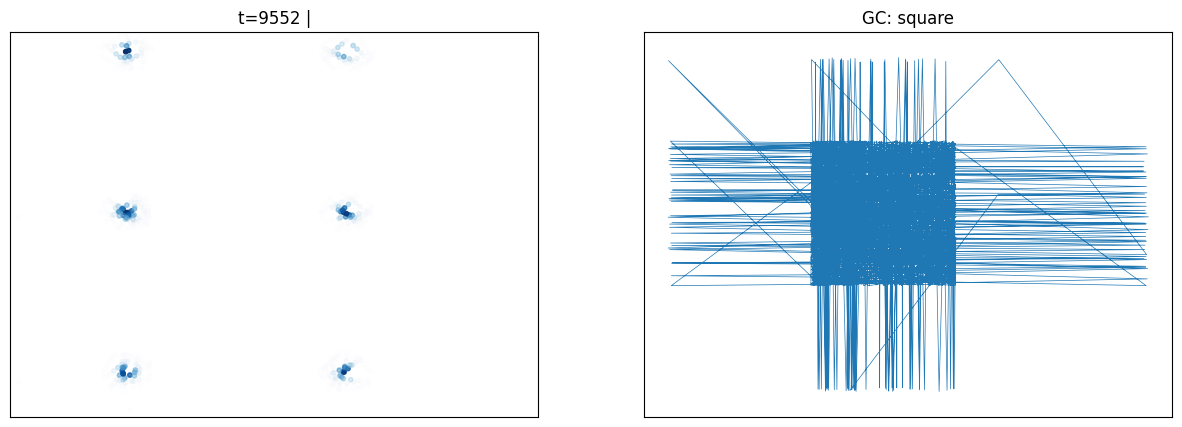

In [40]:
""" online """

gc = GC(sigma=0.05,
        tuning="square",
        speed=0.4)

traj = []
a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = x, y

size = 3
s = np.array([0.01, 0.01])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    x += s[0]
    y += s[1]
#for t, p in enumerate(points):
#    x, y = p

    
    vx = x - x0
    vy = y - y0
    x0 = x
    y0 = y

    if x <= -size: x = 2.9
    elif x >= size: x = -2.9
    if y <= -size: y = 2.9
    elif y >= size: y = -2.9
    
    traj += [[x, y]]
    a += [gc(vx, vy)]  

    if np.abs(x) > size:
        print(x, x <= -3, x >= 3)
        print("x err")
        break
    if np.abs(y) > size:
        print(y, y <= -3, y >= 3)
        print("y err")
        break

    if t % 100 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    if t % np.random.randint(100, 500) == 0:
        clear_output(wait=True)
        #ax.clear()
        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.scatter(*np.array(traj).T, c=a, s=10, alpha=a, cmap="Blues")
        plt.yticks(())
        plt.xticks(())
        plt.title(f"{t=} |")
        plt.ylim((-size, size))
        plt.xlim((-size, size))

        plt.subplot(122)
        gc.render()
        plt.axis('equal')
        
        plt.pause(0.001)

#clear_output(wait=True)
plt.scatter(*np.array(traj).T, c=a, s=20, alpha=0.3)
#plt.yticks(())
#plt.xticks(())
plt.title(f"{x:.3f}, {y:.3f} | {gc.pos()}")
plt.ylim((-size, size))
plt.xlim((-size, size))
#plt.a
plt.pause(0.001)
print("done")

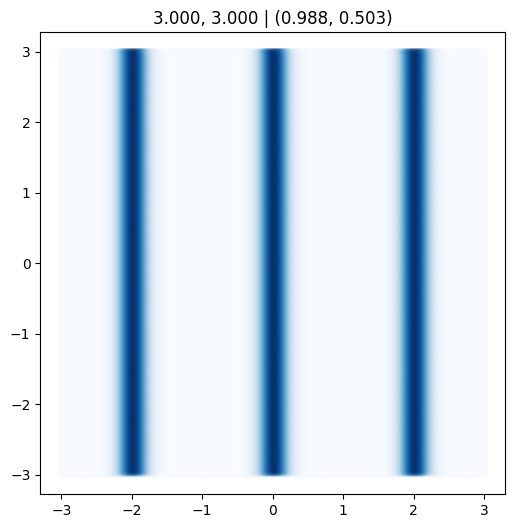

In [351]:
gc = GC(sigma=0.1,
        tuning="circle",
        speed=0.5)

traj = []
a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = x, y

size = 3
s = np.array([0.01, 0.01])

for t, p in enumerate(points):
    x, y = p
    
    vx = x - x0
    vy = y - y0
    x0, y0 = p

    #traj += [[x, y]]
    a += [gc(vx, vy)]

#clear_output(wait=True)
plt.figure(figsize=(6,6))
plt.scatter(*points.T, c=a, s=20, alpha=0.3, cmap="Blues")

plt.title(f"{x:.3f}, {y:.3f} | {gc.pos()}")
#plt.ylim((-size, size))
#plt.xlim((-size, size))
plt.axis('equal')
plt.show()

In [20]:
2*(np.random.binomial(1, 0.5, 2)-0.5)

array([-1.,  1.])

## GC II

In [3]:
gc = pcr.GridLayerWrapper(N=9, sigma=0.1, speed=0.01, kind="hexagon")
print(gc.get_positions())

[[0.        0.       ]
 [0.        0.3333333]
 [0.        0.6666666]
 [0.3333333 0.       ]
 [0.3333333 0.3333333]
 [0.3333333 0.6666666]
 [0.6666666 0.       ]
 [0.6666666 0.3333333]
 [0.6666666 0.6666666]][+] hexagon created

20:00:37 | MAIN | kind: 3
20:00:37 | MAIN | [0, 0.333333, 0.666667]
20:00:37 | MAIN | [0, 0.333333, 0.666667]
xi: 0.000000, yi: 0.000000
xi: 0.000000, yi: 0.333333
xi: 0.000000, yi: 0.666667
xi: 0.333333, yi: 0.000000
xi: 0.333333, yi: 0.333333
xi: 0.333333, yi: 0.666667
xi: 0.666667, yi: 0.000000
xi: 0.666667, yi: 0.333333
xi: 0.666667, yi: 0.666667
[+] GridLayer created


In [14]:
points

array([[0.        , 0.        ],
       [0.05050505, 0.        ],
       [0.1010101 , 0.        ],
       ...,
       [4.8989899 , 5.        ],
       [4.94949495, 5.        ],
       [5.        , 5.        ]])

In [2]:
gc = pcr.GridLayerWrapper(N=9, sigma=0.01, speed=0.4, kind="hexagon")

N = len(gc)

# Generate the grid points
dxy = 0.09
x = np.arange(0., 5 + dxy, dxy)
y = np.arange(0., 5 + dxy, dxy)
xx, yy = np.meshgrid(x, y)

# Combine the grid points into a single array of coordinates
points = np.vstack([xx.ravel(), yy.ravel()]).T

# random walk
points = [[0., 0.]]
#for _ in range(50_000):
#    points += [[points[-1][0]+dxy*np.random.choice((-1., 1.)),
#                points[-1][1]+dxy*np.random.choice((-1., 1.))]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 10
for t in range(10_000):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

points = np.array(points)
old_point = points[0]
activity = np.zeros((N, len(points)))
tra = []
for t in tqdm(range(len(points[1:]))):
    p = points[t]
    activity[:, t] = gc(p-old_point)
    old_point = p
    tra += [gc.get_positions()[0].tolist()]
    #print(f"{gc.get_positions()[0, 0]:.3f} [{gc.get_activation()[0]:.2f}", end=" | ")

n = int(np.sqrt(N))
fig, ax = plt.subplots(n, n, figsize=(6, 6))
ax = ax.flatten()
for i in range(N):
    ax[i].scatter(points[1:, 0], points[1:, 1], c=activity[i, :-1],
                  cmap="hot", s=(10*activity[i, :-1]).astype(int), alpha=0.5)
    ax[i].axis("off")

plt.show()

[+] hexagon created
[+] hexagon created
[-] hexagon destroyed
01:47:07 | MAIN | kind: 3
01:47:07 | MAIN | [0, 0.333333, 0.666667]
01:47:07 | MAIN | [0, 0.333333, 0.666667]
xi: 0.000000, yi: 0.000000
xi: 0.000000, yi: 0.333333
xi: 0.000000, yi: 0.666667
xi: 0.333333, yi: 0.000000
xi: 0.333333, yi: 0.333333
xi: 0.333333, yi: 0.666667
xi: 0.666667, yi: 0.000000
xi: 0.666667, yi: 0.333333
xi: 0.666667, yi: 0.666667
[+] GridLayer created


  0%|                                                                                                                    | 0/10000 [00:00<?, ?it/s]


x1: -0.633975, y1: -0.633975, x2: 0.000000, y2: 0.000000
x: -0.601283, y: -0.601283
_x3: -1.267949, _y3: 0.000000
x: -0.601283, y: -0.601283
m, _m: 1.000000, -1.000000
q, _q: 0.000000, -1.202565
xc: -0.601283, yc: -0.601283
xr: -0.601283, yr: -0.601283

x1: -0.010346, y1: -0.866025, x2: 0.000000, y2: 0.000000
x: -0.010036, y: -0.840073
_x3: -0.876371, _y3: -0.855680
x: -0.010036, y: -0.840073
m, _m: 83.708748, -0.011946
q, _q: -0.000000, -0.840193
xc: -0.010036, yc: -0.840073
xr: -0.010036, yr: -0.840073

x1: -0.333981, y1: -0.866025, x2: 0.000000, y2: 0.000000
x: -0.323972, y: -0.840073
_x3: -1.200006, _y3: -0.532045
x: -0.323972, y: -0.840073
m, _m: 2.593042, -0.385647
q, _q: 0.000000, -0.965012
xc: -0.323972, yc: -0.840073
xr: -0.323972, yr: -0.840073

x1: -0.668053, y1: -0.574949, x2: 0.000000, y2: 0.000000
x: -0.650336, y: -0.559701
_x3: -1.243002, _y3: 0.093105
x: -0.650336, y: -0.559701
m, _m: 0.860633, -1.161935
q, _q: 0.000000, -1.315349
xc: -0.650336, yc: -0.559701
xr: -0.65

 16%|████████████████▌                                                                                       | 1593/10000 [00:05<00:27, 309.09it/s]

, yr: -0.751631

x1: 0.000000, y1: 0.000000, x2: 0.564018, y2: 0.755144
x: 0.555350, y: 0.743539
_x3: -0.755144, _y3: 0.564018
x: 0.555350, y: 0.743539
m, _m: 1.338866, -0.746901
q, _q: 0.000000, 1.158330
xc: 0.555350, yc: 0.743539
xr: 0.555350, yr: 0.743539

x1: 0.000000, y1: 0.000000, x2: 0.962867, y2: 0.064316
x: 0.951451, y: 0.063553
_x3: -0.064316, _y3: 0.962867
x: 0.951451, y: 0.063553
m, _m: 0.066796, -14.970942
q, _q: 0.000000, 14.307669
xc: 0.951451, yc: 0.063553
xr: 0.951451, yr: 0.063553

x1: -0.309339, y1: -0.866025, x2: 0.000000, y2: 0.000000
x: -0.303019, y: -0.848332
_x3: -1.175364, _y3: -0.556687
x: -0.303019, y: -0.848332
m, _m: 2.799601, -0.357194
q, _q: 0.000000, -0.956568
xc: -0.303019, yc: -0.848332
xr: -0.303019, yr: -0.848332

x1: 0.279122, y1: -0.866025, x2: 0.000000, y2: 0.000000
x: 0.272680, y: -0.846036
_x3: -0.586903, _y3: -1.145148
x: 0.272680, y: -0.846036
m, _m: -3.102672, 0.322303
q, _q: 0.000000, -0.933921
xc: 0.272680, yc: -0.846036
xr: 0.272680, yr: -

KeyboardInterrupt: 

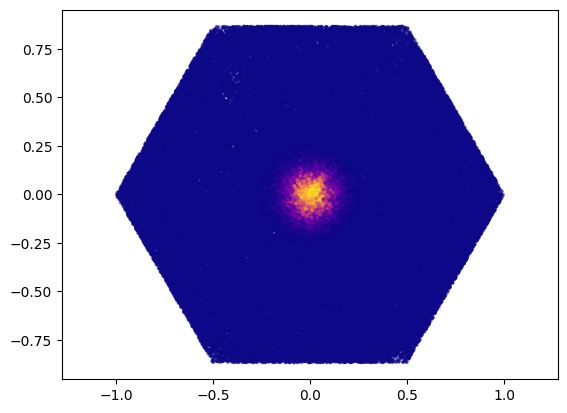

In [101]:
plt.scatter(*np.array(tra).T, c=activity[0, 1:], cmap="plasma", s=3, alpha=0.5)
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.axis("equal")
plt.show()

In [65]:
for t in range(len(points)):
    print(f"{points[t]} : {tra[t]}")

[0. 0.] : [0.09000000357627869, 0.09000000357627869]
[0.09 0.09] : [0.0, 0.18000000715255737]
[0.   0.18] : [0.09000000357627869, 0.09000000357627869]
[0.09 0.09] : [0.0, 0.0]
[0. 0.] : [0.09000000357627869, 0.09000000357627869]
[0.09 0.09] : [0.18000000715255737, 0.18000000715255737]
[0.18 0.18] : [0.09000000357627869, 0.09000000357627869]
[0.09 0.09] : [0.18000000715255737, 0.18000000715255737]
[0.18 0.18] : [0.27000001072883606, 0.27000001072883606]
[0.27 0.27] : [0.36000001430511475, 0.18000000715255737]
[0.36 0.18] : [0.45000001788139343, 0.09000000357627869]
[0.45 0.09] : [0.5400000214576721, 0.18000000715255737]
[0.54 0.18] : [0.45000001788139343, 0.09000000357627869]
[0.45 0.09] : [0.36000001430511475, 0.18000000715255737]
[0.36 0.18] : [0.27000001072883606, 0.09000000357627869]
[0.27 0.09] : [0.36000001430511475, 0.0]
[3.60000000e-01 2.77555756e-17] : [0.27000001072883606, 0.09000000357627869]
[0.27 0.09] : [0.36000001430511475, 0.0]
[3.60000000e-01 2.77555756e-17] : [0.450000

IndexError: list index out of range

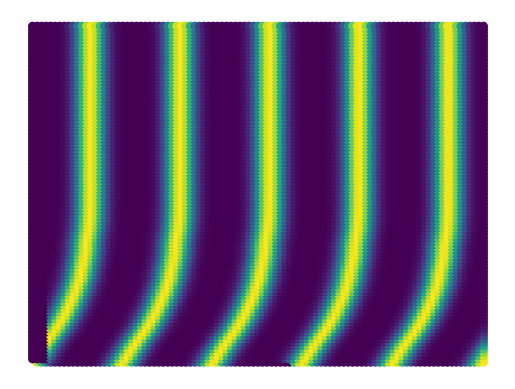

In [28]:
plt.scatter(*points[1:].T, c=activity[0, :-1], s=30)
plt.axis('off')
plt.show()

In [3]:
np.around(gc.get_positions(), 3)

array([[0.   , 0.   ],
       [0.   , 0.333],
       [0.   , 0.667],
       [0.333, 0.   ],
       [0.333, 0.333],
       [0.333, 0.667],
       [0.667, 0.   ],
       [0.667, 0.333],
       [0.667, 0.667]], dtype=float32)

In [75]:
gc_list = [
    pclib.GridLayer(9, 0.02, 0.3, "square"),
    pclib.GridLayer(9, 0.1, 0.1, "square"),
    pclib.GridLayer(9, 0.03, 0.3, "hexagon"),
]
gcn = pclib.GridNetwork(gc_list)

20:24:16 | MAIN | kind: 0
20:24:16 | MAIN | [0, 0.333333, 0.666667]
20:24:16 | MAIN | [0, 0.333333, 0.666667]
20:24:16 | MAIN | kind: 0
20:24:16 | MAIN | [0, 0.333333, 0.666667]
20:24:16 | MAIN | [0, 0.333333, 0.666667]
20:24:16 | MAIN | kind: 3
20:24:16 | MAIN | 
[0, 0]
[0.333333, 0.111111]
[0.666667, 0]
[0, 0.333333]
[0.333333, 0.444444]
[0.666667, 0.333333]
[0, 0.666667]
[0.333333, 0.777778]
[0.666667, 0.666667]


In [27]:
print(f"\nlen={len(gcn)}")


len=27


In [84]:
a = np.zeros((len(gcn), len(points)))
old_points = points[0]
for i, p in enumerate(points[1:]):
    a[:, i] = gcn(p-old_point)
    old_point = p


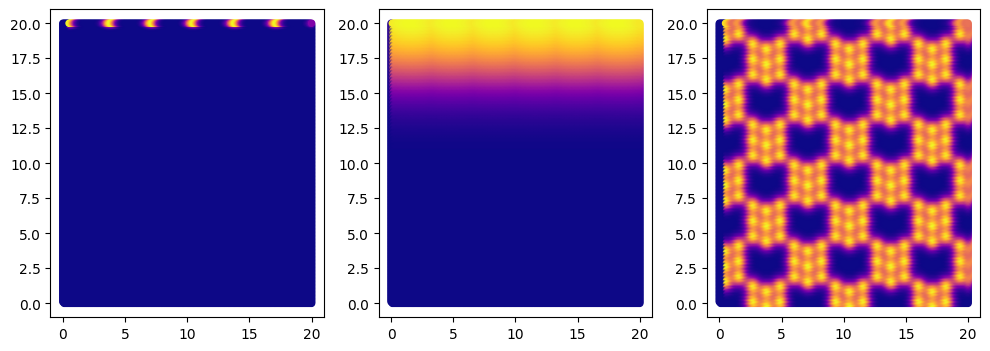

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(points[1:, 0], points[1:, 1], c=a[3, :-1], cmap="plasma", s=20)

plt.subplot(132)
plt.scatter(points[1:, 0], points[1:, 1], c=a[9:18, :-1].sum(axis=0), cmap="plasma", s=20)

plt.subplot(133)
plt.scatter(points[1:, 0], points[1:, 1], c=a[-9:, :-1].sum(axis=0), cmap="plasma", s=20)
plt.show()

In [79]:
a[3]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.89446604e-07, 5.45251339e-07, 9.38723304e-07])

## hexagon

In [3]:
""" online """

#hexagon = pcr.pclib.Hexagon()
gch = pcr.pclib.GridLayer(9, 0.1, 0.3, "hexagon")
#hcc = np.array(hexagon.get_centers()+[hexagon.get_centers()[0]])


a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = []
posj = [gch.get_positions()[0]]

size = 5
s = np.array([0.001, 0.001])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    
    x += s[0]
    y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    acc += [gch([x - x0, y - y0])[4]]
    posj += [gch.get_positions()[4]]

    x0 = x
    y0 = y

    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    if t % 5 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 4))
        plt.subplot(121)
        #plt.plot(*np.array(traj).T, '-k', alpha=1., lw=1.)
        plt.scatter(*np.array(traj).T, c=acc, s=3, cmap="plasma", vmin=0, vmax=0.4)
        plt.title(f"{t=} | {x:.3f}, {y:.3f}")
        plt.ylim((0., size))
        plt.xlim((0., size))
        plt.axis("equal")

        plt.subplot(122)
        plt.scatter(*np.array(posj).T, s=2)
        plt.title(f"a: {acc[-1]:.3f}")
        plt.xlim((-1.1, 1.1))
        plt.ylim((-1.1, 1.1))
        plt.axis("equal")
        
        plt.pause(0.001)


    traj += [[x, y]]


print("done")

KeyboardInterrupt: 

In [19]:
if x <= -size: x = 2.9
    elif x >= size: x = -2.9
    if y <= -size: y = 2.9
    elif y >= size: y = -2.9

array([[ 0.42523265,  0.52173793],
       [ 0.72643054,  0.33338067],
       [-0.8136648 , -0.12986392],
       [-0.4803312 , -0.79653054],
       [-0.4803312 , -0.46319756],
       [-0.4803312 , -0.12986392],
       [-0.14699769, -0.79653054],
       [-0.14699769, -0.46319756],
       [-0.15543582, -0.11524852]], dtype=float32)

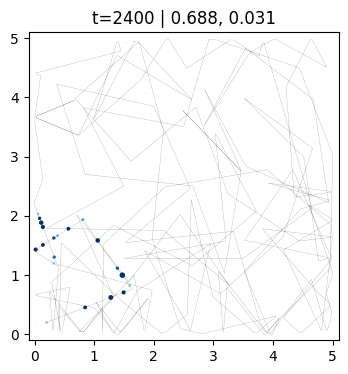

KeyboardInterrupt: 

In [2]:
""" online """

#hexagon = pcr.pclib.Hexagon()
#gch = pcr.pclib.GridLayer(9, 0.1, 0.1, "square")
gch = pcr.GridLayerWrapper(N=9, sigma=0.1, speed=1, kind="square")
#hcc = np.array(hexagon.get_centers()+[hexagon.get_centers()[0]])


a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = []

size = 5
s = np.array([0.001, 0.001])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    acc += [gch([x - x0, y - y0])[4]]
    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    if t % 100 == 0:
        clear_output(wait=True)
        #ax.clear()
        plt.figure(figsize=(4, 4))
        plt.plot(*np.array(traj).T, '-k', alpha=0.4, lw=0.2)
        plt.scatter(*np.array(traj).T, c=acc, s=(10*np.array(acc)).astype(int),
                    cmap="Blues", 
                    alpha=0.99, vmin=0, vmax=0.3)
        #plt.plot(*hcc.T, '-b')
        #plt.yticks(())
        #plt.xticks(())
        plt.title(f"{t=} | {x:.3f}, {y:.3f}")
        plt.ylim((-0.1, size+0.1))
        plt.xlim((-0.1, size+0.1))
        
        plt.pause(0.001)
        #clear_output(wait=True)


    traj += [[x, y]]


print("done")